# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
cities

Number of cities in the list: 625


['vilhena',
 'vallenar',
 'rocha',
 'sangar',
 'jamestown',
 'vao',
 'vardo',
 'qaanaaq',
 'omboue',
 'ancud',
 'hermanus',
 'rikitea',
 'korla',
 'drakino',
 'mataura',
 'busselton',
 'norman wells',
 'port alfred',
 'umzimvubu',
 'marcona',
 'lompoc',
 'mahebourg',
 'khatanga',
 'isangel',
 'attawapiskat',
 'tchibanga',
 'mehtar lam',
 'medicine hat',
 'yellowknife',
 'ribeira grande',
 'puerto ayora',
 'saint george',
 'isla vista',
 'birin',
 'lusambo',
 'veraval',
 'roebourne',
 'taolanaro',
 'bredasdorp',
 'bengkulu',
 'meyungs',
 'nemuro',
 'malinovoye ozero',
 'makakilo city',
 'ascension',
 'vaini',
 'nyurba',
 'shingu',
 'chuy',
 'dikson',
 'yumen',
 'kogon',
 'victoria',
 'maslovare',
 'kuala terengganu',
 'tabou',
 'novopokrovka',
 'talnakh',
 'new norfolk',
 'hilo',
 'ushuaia',
 'cape town',
 'albany',
 'college',
 'tuatapere',
 'kapaa',
 'mar del plata',
 'ust-nera',
 'tasiilaq',
 'fukue',
 'shirokiy',
 'cordoba',
 'saskylakh',
 'mutsamudu',
 'agadez',
 'chokurdakh',
 'av

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    parameters = {
        "appid": weather_api_key,
        "q": city
    }
    # city_url = url+ "appid" + weather_api_key + "&q="+city
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=parameters)
        # pprint(city_weather)
        weather_json=city_weather.json()
        # pprint(weather_json)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        # print(str(e))
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
city_data

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilhena
Processing Record 2 of Set 1 | vallenar
Processing Record 3 of Set 1 | rocha
Processing Record 4 of Set 1 | sangar
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | vao
Processing Record 7 of Set 1 | vardo
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | omboue
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | korla
Processing Record 14 of Set 1 | drakino
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 20 of Set 1 | marcona
City not found. Skipping...
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | mahebourg
Processin

[{'City': 'vilhena',
  'Lat': -12.7406,
  'Lng': -60.1458,
  'Max Temp': 301.27,
  'Humidity': 69,
  'Cloudiness': 40,
  'Wind Speed': 3.09,
  'Country': 'BR',
  'Date': 1680300173},
 {'City': 'vallenar',
  'Lat': -28.5708,
  'Lng': -70.7581,
  'Max Temp': 298.08,
  'Humidity': 49,
  'Cloudiness': 8,
  'Wind Speed': 2.83,
  'Country': 'CL',
  'Date': 1680300173},
 {'City': 'rocha',
  'Lat': -34.4833,
  'Lng': -54.3333,
  'Max Temp': 289.47,
  'Humidity': 50,
  'Cloudiness': 15,
  'Wind Speed': 9.64,
  'Country': 'UY',
  'Date': 1680300086},
 {'City': 'sangar',
  'Lat': 63.9242,
  'Lng': 127.4739,
  'Max Temp': 250.42,
  'Humidity': 95,
  'Cloudiness': 100,
  'Wind Speed': 2.44,
  'Country': 'RU',
  'Date': 1680300173},
 {'City': 'jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 282.99,
  'Humidity': 92,
  'Cloudiness': 100,
  'Wind Speed': 6.17,
  'Country': 'US',
  'Date': 1680300173},
 {'City': 'vao',
  'Lat': -22.6667,
  'Lng': 167.4833,
  'Max Temp': 298.52,
  'Humidit

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilhena,-12.7406,-60.1458,301.27,69,40,3.09,BR,1680300173
1,vallenar,-28.5708,-70.7581,298.08,49,8,2.83,CL,1680300173
2,rocha,-34.4833,-54.3333,289.47,50,15,9.64,UY,1680300086
3,sangar,63.9242,127.4739,250.42,95,100,2.44,RU,1680300173
4,jamestown,42.0970,-79.2353,282.99,92,100,6.17,US,1680300173


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilhena,-12.7406,-60.1458,301.27,69,40,3.09,BR,1680300173
1,vallenar,-28.5708,-70.7581,298.08,49,8,2.83,CL,1680300173
2,rocha,-34.4833,-54.3333,289.47,50,15,9.64,UY,1680300086
3,sangar,63.9242,127.4739,250.42,95,100,2.44,RU,1680300173
4,jamestown,42.0970,-79.2353,282.99,92,100,6.17,US,1680300173


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

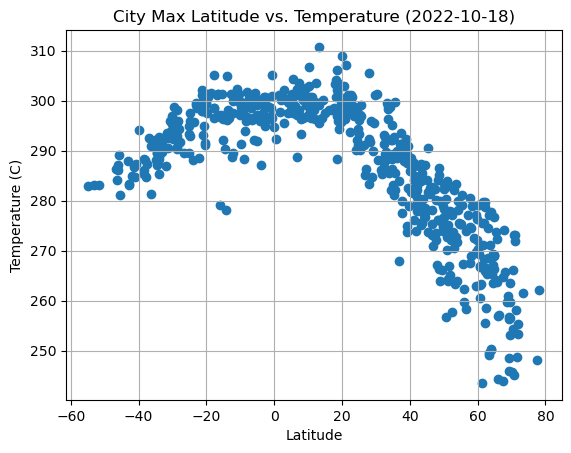

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

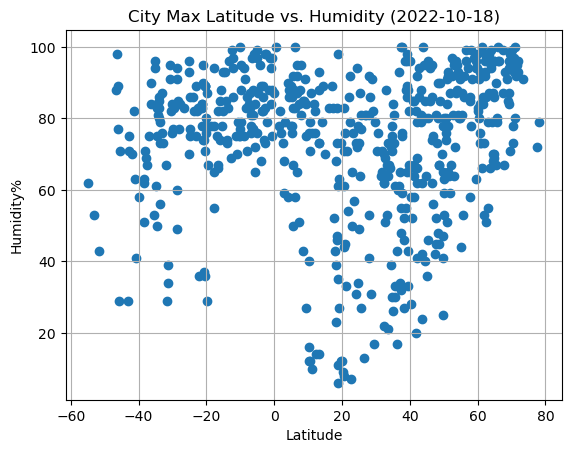

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity%")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

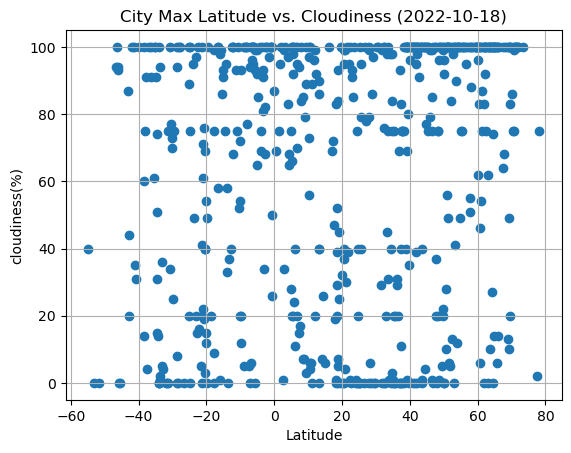

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

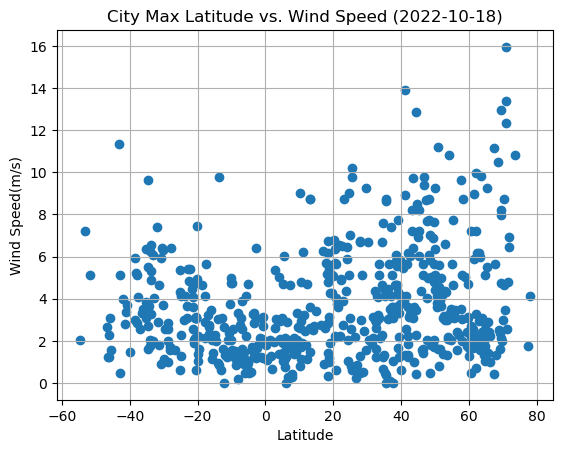

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")


# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_reg_plot(data_x, data_y, title, xlabel, ylabel):
    # Get regression values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(data_x, data_y)
    regress_values = data_x * slope + intercept
    # print(regress_values)

    print(f"The r-value is: {rvalue**2}")


    plt.scatter(data_x, data_y, marker="o")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.plot(data_x,regress_values,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
    plt.annotate(line_eq,(data_x.head(1),data_y.head(1)),fontsize=15,color="red")


    plt.show()




# linear_reg_plot(city_data_df["Lat"], city_data_df["Wind Speed"], "test", "Lat", "Wind Speed")


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,sangar,63.9242,127.4739,250.42,95,100,2.44,RU,1680300173
4,jamestown,42.0970,-79.2353,282.99,92,100,6.17,US,1680300173
6,vardo,70.3705,31.1107,266.14,73,100,8.75,NO,1680300174
7,qaanaaq,77.4840,-69.3632,248.07,72,2,1.75,GL,1680300174
12,korla,41.7597,86.1469,282.79,20,39,5.66,CN,1680300174


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"]<0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilhena,-12.7406,-60.1458,301.27,69,40,3.09,BR,1680300173
1,vallenar,-28.5708,-70.7581,298.08,49,8,2.83,CL,1680300173
2,rocha,-34.4833,-54.3333,289.47,50,15,9.64,UY,1680300086
5,vao,-22.6667,167.4833,298.52,82,15,5.41,NC,1680300174
8,omboue,-1.5746,9.2618,298.67,88,97,2.13,GA,1680300174


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7804166226985086


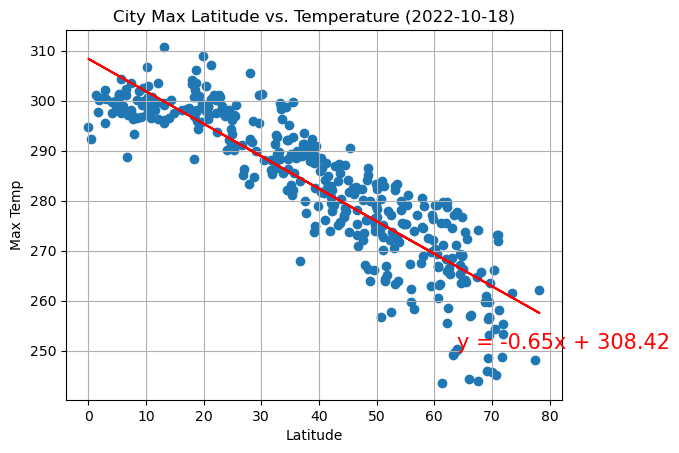

In [15]:
# Linear regression on Northern Hemisphere
linear_reg_plot(data_x=northern_hemi_df["Lat"], data_y=northern_hemi_df["Max Temp"], title="City Max Latitude vs. Temperature (2022-10-18)", xlabel="Latitude", ylabel="Max Temp")


The r-value is: 0.4735886858896356


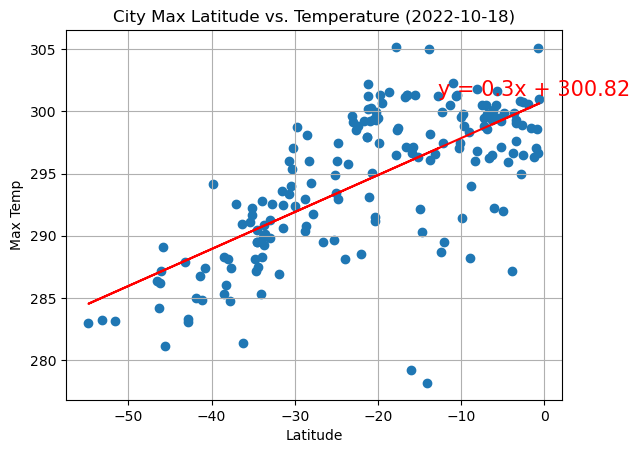

In [16]:
# Linear regression on Southern Hemisphere
linear_reg_plot(data_x=southern_hemi_df["Lat"], data_y=southern_hemi_df["Max Temp"], title="City Max Latitude vs. Temperature (2022-10-18)", xlabel="Latitude", ylabel="Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08577865373204066


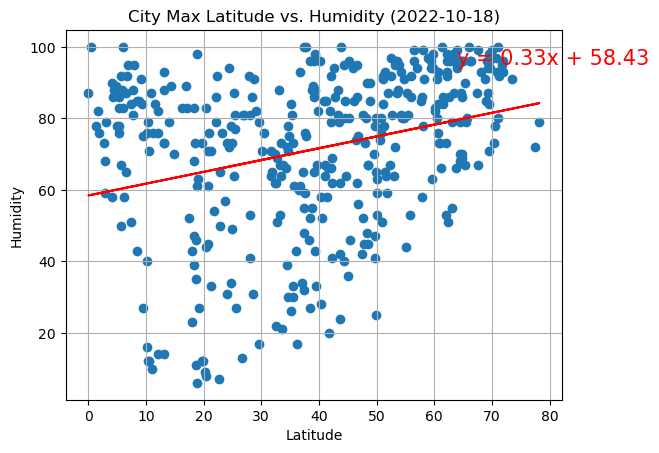

In [17]:
# Northern Hemisphere
linear_reg_plot(data_x=northern_hemi_df["Lat"], data_y=northern_hemi_df["Humidity"], title="City Max Latitude vs. Humidity (2022-10-18)", xlabel="Latitude", ylabel="Humidity")

The r-value is: 0.14834199431288683


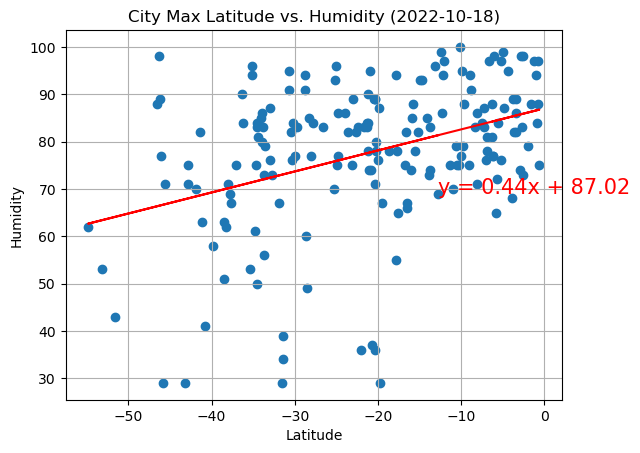

In [18]:
# Southern Hemisphere
linear_reg_plot(data_x=southern_hemi_df["Lat"], data_y=southern_hemi_df["Humidity"], title="City Max Latitude vs. Humidity (2022-10-18)", xlabel="Latitude", ylabel="Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04838957366940237


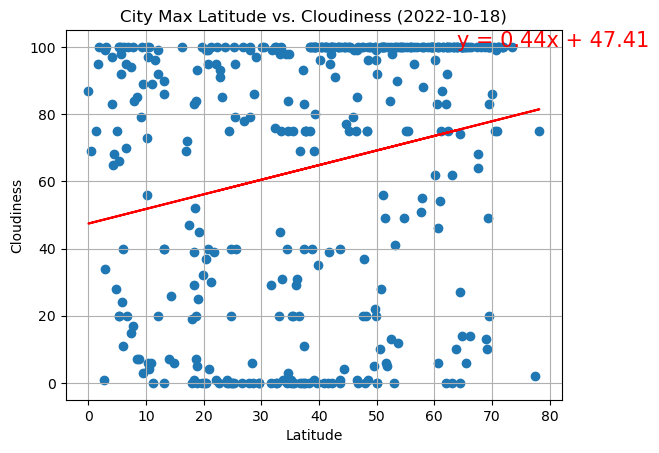

In [19]:
# Northern Hemisphere
linear_reg_plot(data_x=northern_hemi_df["Lat"], data_y=northern_hemi_df["Cloudiness"], title="City Max Latitude vs. Cloudiness (2022-10-18)", xlabel="Latitude", ylabel="Cloudiness")

The r-value is: 0.06535690809395432


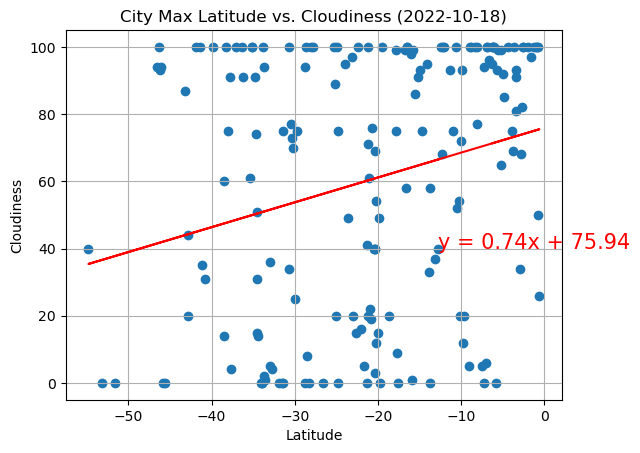

In [20]:
# Southern Hemisphere
linear_reg_plot(data_x=southern_hemi_df["Lat"], data_y=southern_hemi_df["Cloudiness"], title="City Max Latitude vs. Cloudiness (2022-10-18)", xlabel="Latitude", ylabel="Cloudiness")

**Discussion about the linear relationship:** In both Northern hemisphere and Southern hemisphere, As latitude increased, cloudiness increased, too. 
According to the R value, in In both Northern hemisphere and Southern hemisphere, linear relationships are weak.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.047564089409887274


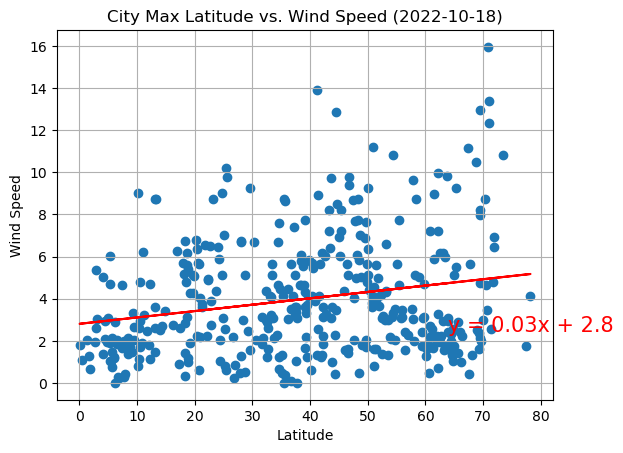

In [21]:
# Northern Hemisphere
linear_reg_plot(data_x=northern_hemi_df["Lat"], data_y=northern_hemi_df["Wind Speed"], title="City Max Latitude vs. Wind Speed (2022-10-18)", xlabel="Latitude", ylabel="Wind Speed")

The r-value is: 0.11903205404065612


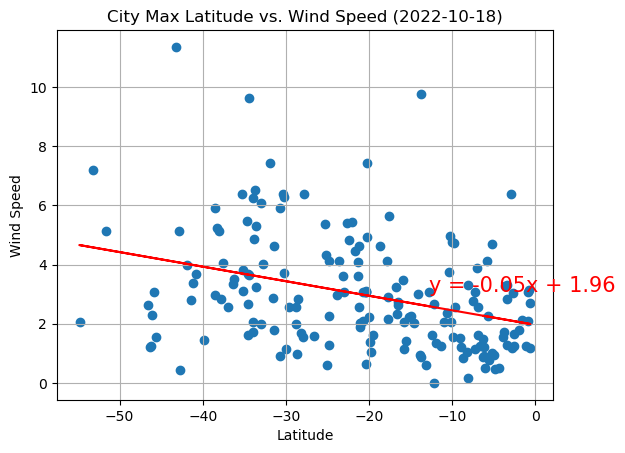

In [22]:
# Southern Hemisphere
linear_reg_plot(data_x=southern_hemi_df["Lat"], data_y=southern_hemi_df["Wind Speed"], title="City Max Latitude vs. Wind Speed (2022-10-18)", xlabel="Latitude", ylabel="Wind Speed")

**Discussion about the linear relationship:** In Northern hemisphere, As latitude increased, windspeed increased.
In Southern hemisphere, As latitude increased, windspeed decreased.
According to the R value, in Northern hemisphere, the linear relationship is weak. In southern hemisphere it is more approaching to a perferct negative correlation.
                                            